<a href="https://colab.research.google.com/github/EyeofaThous/AAE590/blob/main/AAE590HW2_Q1_METRICS_tbranno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initialization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
OnemmDisp = pd.read_excel("Data590.xlsx", sheet_name="1mm Disp")
FivemmDisp = pd.read_excel("Data590.xlsx", sheet_name="5mm Disp")
OnehundLoad = pd.read_excel("Data590.xlsx", sheet_name="100N Load")
FivehundLoad = pd.read_excel("Data590.xlsx", sheet_name="500N Load")

**1mm Displacement Work**

In [ ]:
OnemmDisp[['Volume Fraction', 'Holes', 'Mat A', 'Mat B']] = OnemmDisp[['Volume Fraction', 'Holes', 'Mat A', 'Mat B']].astype(float)

X = OnemmDisp[['Volume Fraction']]  # Feature
y_holes = OnemmDisp[['Holes']]  # Target for Holes stress
y_mat_a = OnemmDisp[['Mat A']]  # Target for Mat A stress
y_mat_b = OnemmDisp[['Mat B']]  # Target for Mat B stress

Holes Work

R2 Score (Ridge - Holes): -0.1753022748535813
MSE (Ridge - Holes): 34946.628500643186
R2 Score (Lasso - Holes): -0.15508604458898212
MSE (Lasso - Holes): 34345.515830433804
Ridge Coefficients for Holes: [20.55555469]
Lasso Coefficients for Holes: [22.51111016]


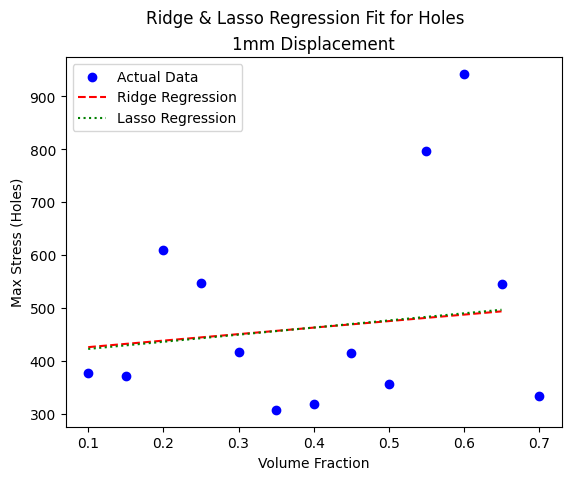

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler

# Split data into training and testing sets
X_tr, X_te, y_tr_h, y_te_h = train_test_split(X, y_holes, test_size=0.2, random_state=42)
X_tr, X_te, y_tr_a, y_te_a = train_test_split(X, y_mat_a, test_size=0.2, random_state=42)
X_tr, X_te, y_tr_b, y_te_b = train_test_split(X, y_mat_b, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_tr_sc = scaler.fit_transform(X_tr)
X_te_sc = scaler.transform(X_te)

# Initialize Ridge and Lasso models
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

# Fit models to Holes stress data
ridge.fit(X_tr_sc, y_tr_h)
lasso.fit(X_tr_sc, y_tr_h)

# Predict using Ridge and Lasso
ridge_preds_holes = ridge.predict(X_te_sc)
lasso_preds_holes = lasso.predict(X_te_sc)

print("R2 Score (Ridge - Holes):", r2_score(y_te_h, ridge_preds_holes))
print("MSE (Ridge - Holes):", mean_squared_error(y_te_h, ridge_preds_holes))

print("R2 Score (Lasso - Holes):", r2_score(y_te_h, lasso_preds_holes))
print("MSE (Lasso - Holes):", mean_squared_error(y_te_h, lasso_preds_holes))
# Print model coefficients

print("Ridge Coefficients for Holes:", ridge.coef_)
print("Lasso Coefficients for Holes:", lasso.coef_)

# Scatter plot of actual data
plt.scatter(X, y_holes, color="blue", label="Actual Data")

# Sort X values for smooth plotting
X_sorted = np.sort(X_te.values.flatten())
ridge_preds_sorted = ridge.predict(np.sort(X_te_sc, axis=0))
lasso_preds_sorted = lasso.predict(np.sort(X_te_sc, axis=0))

# Plot Ridge regression line
plt.plot(X_sorted, ridge_preds_sorted, color="red", label="Ridge Regression", linestyle="dashed")

# Plot Lasso regression line
plt.plot(X_sorted, lasso_preds_sorted, color="green", label="Lasso Regression", linestyle="dotted")

plt.xlabel("Volume Fraction")
plt.ylabel("Max Stress (Holes)")
plt.suptitle("Ridge & Lasso Regression Fit for Holes")
plt.title('1mm Displacement')
plt.legend()
plt.show()

Mat A Work

R2 Score (Ridge - Mat A): -1.137224331337356
MSE (Ridge - Mat A): 63548.57497326535
R2 Score (Lasso - Mat A): -1.1004275238888201
MSE (Lasso - Mat A): 62454.45273133071
Ridge Coefficients for Mat A: [41.13287972]
Lasso Coefficients for Mat A: [45.14616769]


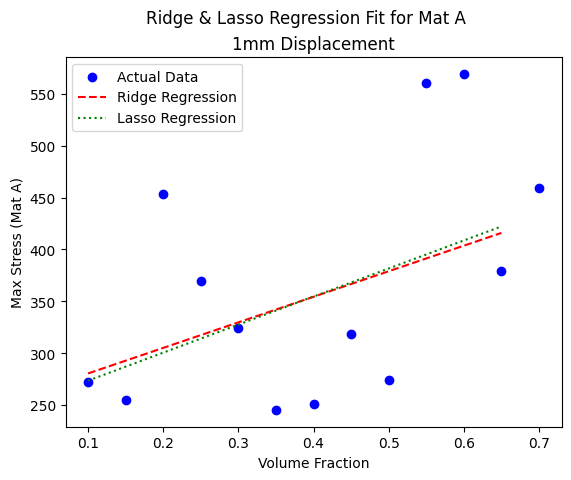

In [ ]:
# Fit models to Mat A stress data
ridge.fit(X_tr_sc, y_tr_a)
lasso.fit(X_tr_sc, y_tr_a)

# Predict using Ridge & Lasso
ridge_preds_a = ridge.predict(X_te_sc)
lasso_preds_a = lasso.predict(X_te_sc)
print("R2 Score (Ridge - Mat A):", r2_score(y_te_h, ridge_preds_a))
print("MSE (Ridge - Mat A):", mean_squared_error(y_te_h, ridge_preds_a))

print("R2 Score (Lasso - Mat A):", r2_score(y_te_h, lasso_preds_a))
print("MSE (Lasso - Mat A):", mean_squared_error(y_te_h, lasso_preds_a))
# Print model coefficients

print("Ridge Coefficients for Mat A:", ridge.coef_)
print("Lasso Coefficients for Mat A:", lasso.coef_)

# Scatter plot of actual data
plt.scatter(X, y_mat_a, color="blue", label="Actual Data")

# Sort X values for smooth plotting
X_sorted = np.sort(X_te.values.flatten())
ridge_preds_sorted = ridge.predict(np.sort(X_te_sc, axis=0))
lasso_preds_sorted = lasso.predict(np.sort(X_te_sc, axis=0))

# Plot Ridge regression line
plt.plot(X_sorted, ridge_preds_sorted, color="red", label="Ridge Regression", linestyle="dashed")

# Plot Lasso regression line
plt.plot(X_sorted, lasso_preds_sorted, color="green", label="Lasso Regression", linestyle="dotted")

plt.xlabel("Volume Fraction")
plt.ylabel("Max Stress (Mat A)")
plt.suptitle("Ridge & Lasso Regression Fit for Mat A")
plt.title("1mm Displacement")
plt.legend()
plt.show()

Mat B Work

R2 Score (Ridge - Mat B): -3.5065812334556252
MSE (Ridge - Mat B): 133999.41746319184
R2 Score (Lasso - Mat B): -3.4833810617121985
MSE (Lasso - Mat B): 133309.5797929894
Ridge Coefficients for Mat B: [16.65975241]
Lasso Coefficients for Mat B: [18.22572765]


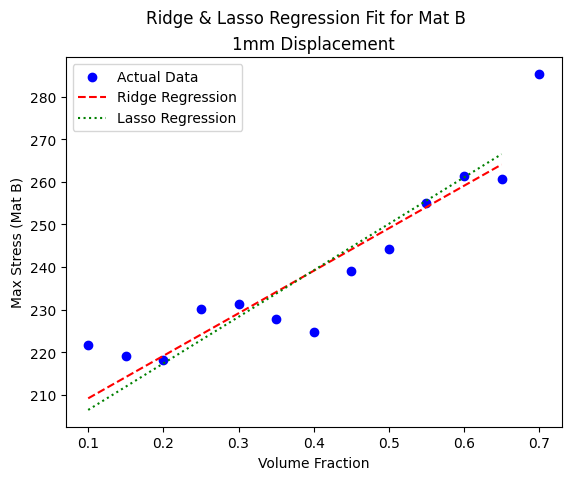

In [ ]:
# Fit models to Mat A stress data
ridge.fit(X_tr_sc, y_tr_b)
lasso.fit(X_tr_sc, y_tr_b)

# Predict using Ridge & Lasso
ridge_preds_b = ridge.predict(X_te_sc)
lasso_preds_b = lasso.predict(X_te_sc)
print("R2 Score (Ridge - Mat B):", r2_score(y_te_h, ridge_preds_b))
print("MSE (Ridge - Mat B):", mean_squared_error(y_te_h, ridge_preds_b))

print("R2 Score (Lasso - Mat B):", r2_score(y_te_h, lasso_preds_b))
print("MSE (Lasso - Mat B):", mean_squared_error(y_te_h, lasso_preds_b))
# Print model coefficients
print("Ridge Coefficients for Mat B:", ridge.coef_)
print("Lasso Coefficients for Mat B:", lasso.coef_)

# Scatter plot of actual data
plt.scatter(X, y_mat_b, color="blue", label="Actual Data")

# Sort X values for smooth plotting
X_sorted = np.sort(X_te.values.flatten())
ridge_preds_sorted = ridge.predict(np.sort(X_te_sc, axis=0))
lasso_preds_sorted = lasso.predict(np.sort(X_te_sc, axis=0))

# Plot Ridge regression line
plt.plot(X_sorted, ridge_preds_sorted, color="red", label="Ridge Regression", linestyle="dashed")

# Plot Lasso regression line
plt.plot(X_sorted, lasso_preds_sorted, color="green", label="Lasso Regression", linestyle="dotted")

plt.xlabel("Volume Fraction")
plt.ylabel("Max Stress (Mat B)")
plt.suptitle("Ridge & Lasso Regression Fit for Mat B")
plt.title('1mm Displacement')
plt.legend()
plt.show()

**5mm Displacement Work**

In [ ]:
FivemmDisp[['Volume Fraction', 'Holes', 'Mat A', 'Mat B']] = FivemmDisp[['Volume Fraction', 'Holes', 'Mat A', 'Mat B']].astype(float)

X = FivemmDisp[['Volume Fraction']]  # Feature
y_holes = FivemmDisp[['Holes']]  # Target for Holes stress
y_mat_a = FivemmDisp[['Mat A']]  # Target for Mat A stress
y_mat_b = FivemmDisp[['Mat B']]  # Target for Mat B stress

Holes Work

R2 Score (Ridge - Holes): -0.1759998872940236
MSE (Ridge - Holes): 874239.1002143021
R2 Score (Lasso - Holes): -0.15498499920056585
MSE (Lasso - Holes): 858616.6183957001
Ridge Coefficients for Holes: [102.69613466]
Lasso Coefficients for Holes: [112.86574813]


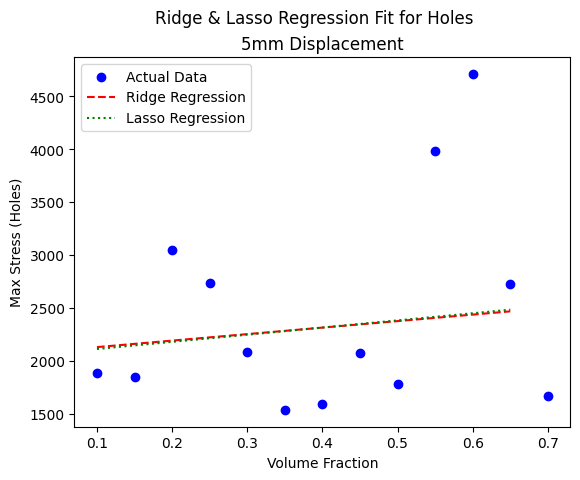

In [ ]:
# Split data into training and testing sets
X_tr, X_te, y_tr_h, y_te_h = train_test_split(X, y_holes, test_size=0.2, random_state=42)
X_tr, X_te, y_tr_a, y_te_a = train_test_split(X, y_mat_a, test_size=0.2, random_state=42)
X_tr, X_te, y_tr_b, y_te_b = train_test_split(X, y_mat_b, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_tr_sc = scaler.fit_transform(X_tr)
X_te_sc = scaler.transform(X_te)

# Initialize Ridge and Lasso models
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

# Fit models to Holes stress data
ridge.fit(X_tr_sc, y_tr_h)
lasso.fit(X_tr_sc, y_tr_h)

# Predict using Ridge and Lasso
ridge_preds_holes = ridge.predict(X_te_sc)
lasso_preds_holes = lasso.predict(X_te_sc)
print("R2 Score (Ridge - Holes):", r2_score(y_te_h, ridge_preds_holes))
print("MSE (Ridge - Holes):", mean_squared_error(y_te_h, ridge_preds_holes))

print("R2 Score (Lasso - Holes):", r2_score(y_te_h, lasso_preds_holes))
print("MSE (Lasso - Holes):", mean_squared_error(y_te_h, lasso_preds_holes))
# Print model coefficients
print("Ridge Coefficients for Holes:", ridge.coef_)
print("Lasso Coefficients for Holes:", lasso.coef_)

# Scatter plot of actual data
plt.scatter(X, y_holes, color="blue", label="Actual Data")

# Sort X values for smooth plotting
X_sorted = np.sort(X_te.values.flatten())
ridge_preds_sorted = ridge.predict(np.sort(X_te_sc, axis=0))
lasso_preds_sorted = lasso.predict(np.sort(X_te_sc, axis=0))

# Plot Ridge regression line
plt.plot(X_sorted, ridge_preds_sorted, color="red", label="Ridge Regression", linestyle="dashed")

# Plot Lasso regression line
plt.plot(X_sorted, lasso_preds_sorted, color="green", label="Lasso Regression", linestyle="dotted")

plt.xlabel("Volume Fraction")
plt.ylabel("Max Stress (Holes)")
plt.suptitle("Ridge & Lasso Regression Fit for Holes")
plt.title('5mm Displacement')
plt.legend()
plt.show()

Mat A Work

R2 Score (Ridge - Mat A): -2.8342203826234633
MSE (Ridge - Mat A): 2850361.9885892044
R2 Score (Lasso - Mat A): -2.8917160116396863
MSE (Lasso - Mat A): 2893104.277530284
Ridge Coefficients for Mat A: [-142.62674737]
Lasso Coefficients for Mat A: [-156.78942211]


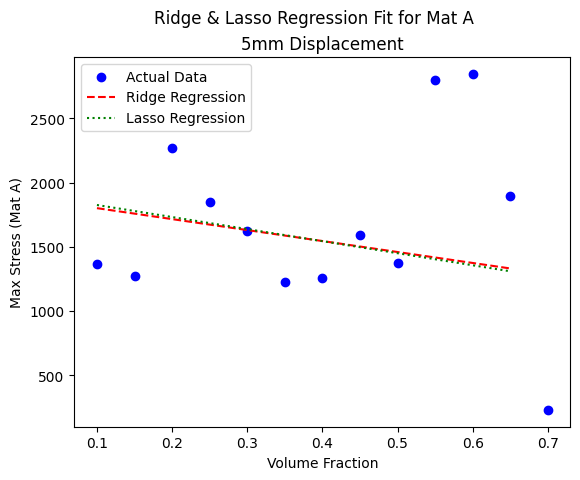

In [ ]:
# Fit models to Mat A stress data
ridge.fit(X_tr_sc, y_tr_a)
lasso.fit(X_tr_sc, y_tr_a)

# Predict using Ridge & Lasso
ridge_preds_a = ridge.predict(X_te_sc)
lasso_preds_a = lasso.predict(X_te_sc)
print("R2 Score (Ridge - Mat A):", r2_score(y_te_h, ridge_preds_a))
print("MSE (Ridge - Mat A):", mean_squared_error(y_te_h, ridge_preds_a))

print("R2 Score (Lasso - Mat A):", r2_score(y_te_h, lasso_preds_a))
print("MSE (Lasso - Mat A):", mean_squared_error(y_te_h, lasso_preds_a))
# Print model coefficients
print("Ridge Coefficients for Mat A:", ridge.coef_)
print("Lasso Coefficients for Mat A:", lasso.coef_)

# Scatter plot of actual data
plt.scatter(X, y_mat_a, color="blue", label="Actual Data")

# Sort X values for smooth plotting
X_sorted = np.sort(X_te.values.flatten())
ridge_preds_sorted = ridge.predict(np.sort(X_te_sc, axis=0))
lasso_preds_sorted = lasso.predict(np.sort(X_te_sc, axis=0))

# Plot Ridge regression line
plt.plot(X_sorted, ridge_preds_sorted, color="red", label="Ridge Regression", linestyle="dashed")

# Plot Lasso regression line
plt.plot(X_sorted, lasso_preds_sorted, color="green", label="Lasso Regression", linestyle="dotted")

plt.xlabel("Volume Fraction")
plt.ylabel("Max Stress (Mat A)")
plt.suptitle("Ridge & Lasso Regression Fit for Mat A")
plt.title('5mm Displacement')
plt.legend()
plt.show()

Mat B Work

R2 Score (Ridge - Mat B): -3.508055304855578
MSE (Ridge - Mat B): 3351291.31899984
R2 Score (Lasso - Mat B): -3.4836971405898085
MSE (Lasso - Mat B): 3333183.4434458907
Ridge Coefficients for Mat B: [83.2443362]
Lasso Coefficients for Mat B: [91.46876982]


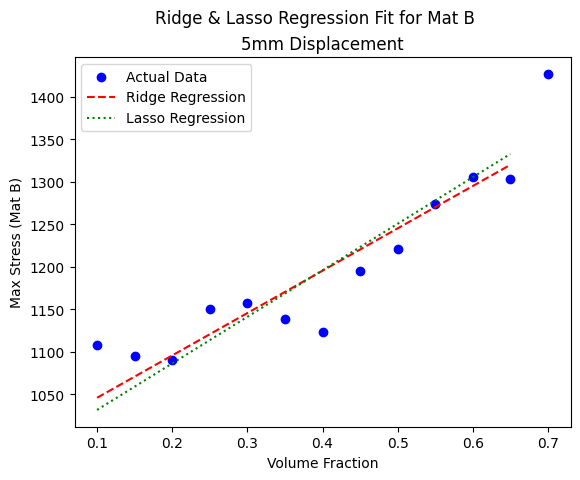

In [ ]:
# Fit models to Mat B stress data
ridge.fit(X_tr_sc, y_tr_b)
lasso.fit(X_tr_sc, y_tr_b)

# Predict using Ridge & Lasso
ridge_preds_b = ridge.predict(X_te_sc)
lasso_preds_b = lasso.predict(X_te_sc)
print("R2 Score (Ridge - Mat B):", r2_score(y_te_h, ridge_preds_b))
print("MSE (Ridge - Mat B):", mean_squared_error(y_te_h, ridge_preds_b))

print("R2 Score (Lasso - Mat B):", r2_score(y_te_h, lasso_preds_b))
print("MSE (Lasso - Mat B):", mean_squared_error(y_te_h, lasso_preds_b))
# Print model coefficients
print("Ridge Coefficients for Mat B:", ridge.coef_)
print("Lasso Coefficients for Mat B:", lasso.coef_)

# Scatter plot of actual data
plt.scatter(X, y_mat_b, color="blue", label="Actual Data")

# Sort X values for smooth plotting
X_sorted = np.sort(X_te.values.flatten())
ridge_preds_sorted = ridge.predict(np.sort(X_te_sc, axis=0))
lasso_preds_sorted = lasso.predict(np.sort(X_te_sc, axis=0))

# Plot Ridge regression line
plt.plot(X_sorted, ridge_preds_sorted, color="red", label="Ridge Regression", linestyle="dashed")

# Plot Lasso regression line
plt.plot(X_sorted, lasso_preds_sorted, color="green", label="Lasso Regression", linestyle="dotted")

plt.xlabel("Volume Fraction")
plt.ylabel("Max Stress (Mat B)")
plt.suptitle("Ridge & Lasso Regression Fit for Mat B")
plt.title("5mm Displacement")
plt.legend()
plt.show()

**100N Work**

In [ ]:
OnehundLoad[['Volume Fraction', 'Holes', 'Mat A', 'Mat B']] = OnehundLoad[['Volume Fraction', 'Holes', 'Mat A', 'Mat B']].astype(float)

X = OnehundLoad[['Volume Fraction']]  # Feature
y_holes = OnehundLoad[['Holes']]  # Target for Holes displacement
y_mat_a = OnehundLoad[['Mat A']]  # Target for Mat A displacement
y_mat_b = OnehundLoad[['Mat B']]  # Target for Mat B displacement

Holes Work

R2 Score (Ridge - Holes): -11.156186752241833
MSE (Ridge - Holes): 9.142480689002609
R2 Score (Lasso - Holes): -12.853811496442336
MSE (Lasso - Holes): 10.419238093059752
Ridge Coefficients for Holes: [2.46117282]
Lasso Coefficients for Holes: [2.6072901]


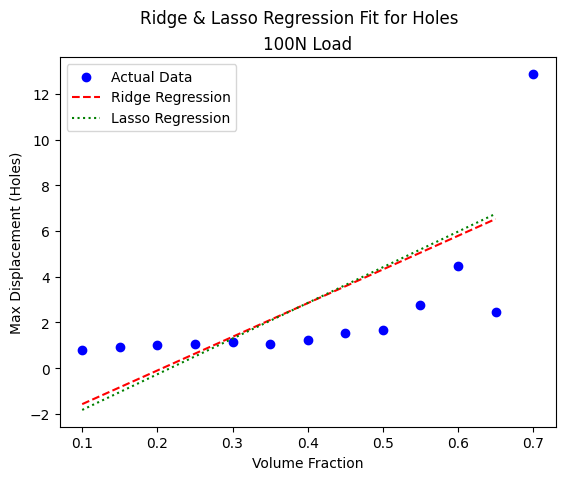

In [ ]:
# Split data into training and testing sets
X_tr, X_te, y_tr_h, y_te_h = train_test_split(X, y_holes, test_size=0.2, random_state=42)
X_tr, X_te, y_tr_a, y_te_a = train_test_split(X, y_mat_a, test_size=0.2, random_state=42)
X_tr, X_te, y_tr_b, y_te_b = train_test_split(X, y_mat_b, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_tr_sc = scaler.fit_transform(X_tr)
X_te_sc = scaler.transform(X_te)

# Initialize Ridge and Lasso models
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

# Fit models to Holes stress data
ridge.fit(X_tr_sc, y_tr_h)
lasso.fit(X_tr_sc, y_tr_h)

# Predict using Ridge and Lasso
ridge_preds_holes = ridge.predict(X_te_sc)
lasso_preds_holes = lasso.predict(X_te_sc)
print("R2 Score (Ridge - Holes):", r2_score(y_te_h, ridge_preds_holes))
print("MSE (Ridge - Holes):", mean_squared_error(y_te_h, ridge_preds_holes))

print("R2 Score (Lasso - Holes):", r2_score(y_te_h, lasso_preds_holes))
print("MSE (Lasso - Holes):", mean_squared_error(y_te_h, lasso_preds_holes))
# Print model coefficients
print("Ridge Coefficients for Holes:", ridge.coef_)
print("Lasso Coefficients for Holes:", lasso.coef_)

# Scatter plot of actual data
plt.scatter(X, y_holes, color="blue", label="Actual Data")

# Sort X values for smooth plotting
X_sorted = np.sort(X_te.values.flatten())
ridge_preds_sorted = ridge.predict(np.sort(X_te_sc, axis=0))
lasso_preds_sorted = lasso.predict(np.sort(X_te_sc, axis=0))

# Plot Ridge regression line
plt.plot(X_sorted, ridge_preds_sorted, color="red", label="Ridge Regression", linestyle="dashed")

# Plot Lasso regression line
plt.plot(X_sorted, lasso_preds_sorted, color="green", label="Lasso Regression", linestyle="dotted")

plt.xlabel("Volume Fraction")
plt.ylabel("Max Displacement (Holes)")
plt.suptitle("Ridge & Lasso Regression Fit for Holes")
plt.title('100N Load')
plt.legend()
plt.show()

Mat A Work

R2 Score (Ridge - Mat A): -0.5248059269740168
MSE (Ridge - Mat A): 1.1467830353351371
R2 Score (Lasso - Mat A): -0.7355283535345849
MSE (Lasso - Mat A): 1.305264124416339
Ridge Coefficients for Mat A: [0.22861959]
Lasso Coefficients for Mat A: [0.15148155]


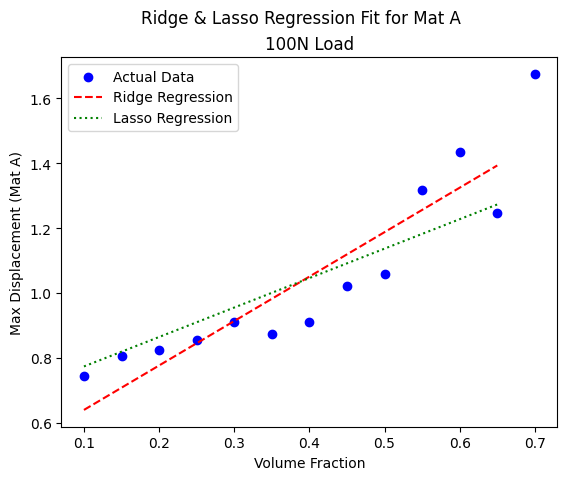

In [ ]:
# Fit models to Mat A displacement data
ridge.fit(X_tr_sc, y_tr_a)
lasso.fit(X_tr_sc, y_tr_a)

# Predict using Ridge & Lasso
ridge_preds_a = ridge.predict(X_te_sc)
lasso_preds_a = lasso.predict(X_te_sc)
print("R2 Score (Ridge - Mat A):", r2_score(y_te_h, ridge_preds_a))
print("MSE (Ridge - Mat A):", mean_squared_error(y_te_h, ridge_preds_a))

print("R2 Score (Lasso - Mat A):", r2_score(y_te_h, lasso_preds_a))
print("MSE (Lasso - Mat A):", mean_squared_error(y_te_h, lasso_preds_a))
# Print model coefficients
print("Ridge Coefficients for Mat A:", ridge.coef_)
print("Lasso Coefficients for Mat A:", lasso.coef_)

# Scatter plot of actual data
plt.scatter(X, y_mat_a, color="blue", label="Actual Data")

# Sort X values for smooth plotting
X_sorted = np.sort(X_te.values.flatten())
ridge_preds_sorted = ridge.predict(np.sort(X_te_sc, axis=0))
lasso_preds_sorted = lasso.predict(np.sort(X_te_sc, axis=0))

# Plot Ridge regression line
plt.plot(X_sorted, ridge_preds_sorted, color="red", label="Ridge Regression", linestyle="dashed")

# Plot Lasso regression line
plt.plot(X_sorted, lasso_preds_sorted, color="green", label="Lasso Regression", linestyle="dotted")

plt.xlabel("Volume Fraction")
plt.ylabel("Max Displacement (Mat A)")
plt.suptitle("Ridge & Lasso Regression Fit for Mat A")
plt.title('100N Load')
plt.legend()
plt.show()

Mat B Work

R2 Score (Ridge - Mat B): -2.852981872967553
MSE (Ridge - Mat B): 2.897768279364962
R2 Score (Lasso - Mat B): -2.694011461370374
MSE (Lasso - Mat B): 2.7782090830666673
Ridge Coefficients for Mat B: [-0.03765017]
Lasso Coefficients for Mat B: [-0.]


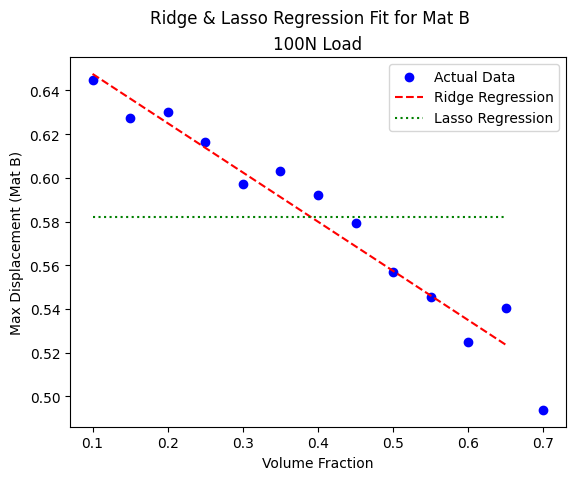

In [ ]:
# Fit models to Mat B displacement data
ridge.fit(X_tr_sc, y_tr_b)
lasso.fit(X_tr_sc, y_tr_b)

# Predict using Ridge & Lasso
ridge_preds_b = ridge.predict(X_te_sc)
lasso_preds_b = lasso.predict(X_te_sc)
print("R2 Score (Ridge - Mat B):", r2_score(y_te_h, ridge_preds_b))
print("MSE (Ridge - Mat B):", mean_squared_error(y_te_h, ridge_preds_b))

print("R2 Score (Lasso - Mat B):", r2_score(y_te_h, lasso_preds_b))
print("MSE (Lasso - Mat B):", mean_squared_error(y_te_h, lasso_preds_b))
# Print model coefficients
print("Ridge Coefficients for Mat B:", ridge.coef_)
print("Lasso Coefficients for Mat B:", lasso.coef_)

# Scatter plot of actual data
plt.scatter(X, y_mat_b, color="blue", label="Actual Data")

# Sort X values for smooth plotting
X_sorted = np.sort(X_te.values.flatten())
ridge_preds_sorted = ridge.predict(np.sort(X_te_sc, axis=0))
lasso_preds_sorted = lasso.predict(np.sort(X_te_sc, axis=0))

# Plot Ridge regression line
plt.plot(X_sorted, ridge_preds_sorted, color="red", label="Ridge Regression", linestyle="dashed")

# Plot Lasso regression line
plt.plot(X_sorted, lasso_preds_sorted, color="green", label="Lasso Regression", linestyle="dotted")

plt.xlabel("Volume Fraction")
plt.ylabel("Max Displacement (Mat B)")
plt.suptitle("Ridge & Lasso Regression Fit for Mat B")
plt.title('100N Load')
plt.legend()
plt.show()

**500N Load Work**

In [ ]:
FivehundLoad[['Volume Fraction', 'Holes', 'Mat A', 'Mat B']] = FivehundLoad[['Volume Fraction', 'Holes', 'Mat A', 'Mat B']].astype(float)

X = FivehundLoad[['Volume Fraction']]  # Feature
y_holes = FivehundLoad[['Holes']]  # Target for Holes displacement
y_mat_a = FivehundLoad[['Mat A']]  # Target for Mat A displacement
y_mat_b = FivehundLoad[['Mat B']]  # Target for Mat B displacement

Holes Work

R2 Score (Ridge - Holes): -11.149521567212984
MSE (Ridge - Holes): 228.43669765187818
R2 Score (Lasso - Holes): -13.826278590184758
MSE (Lasso - Holes): 278.7653901325988
Ridge Coefficients for Holes: [12.30344214]
Lasso Coefficients for Holes: [13.43378635]


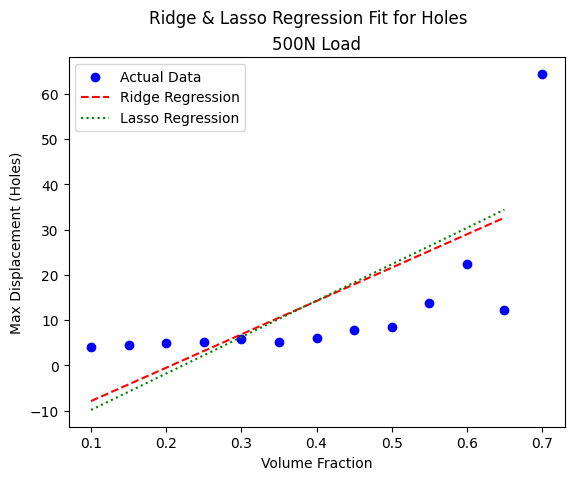

In [ ]:
# Split data into training and testing sets
X_tr, X_te, y_tr_h, y_te_h = train_test_split(X, y_holes, test_size=0.2, random_state=42)
X_tr, X_te, y_tr_a, y_te_a = train_test_split(X, y_mat_a, test_size=0.2, random_state=42)
X_tr, X_te, y_tr_b, y_te_b = train_test_split(X, y_mat_b, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_tr_sc = scaler.fit_transform(X_tr)
X_te_sc = scaler.transform(X_te)

# Initialize Ridge and Lasso models
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

# Fit models to Holes stress data
ridge.fit(X_tr_sc, y_tr_h)
lasso.fit(X_tr_sc, y_tr_h)

# Predict using Ridge and Lasso
ridge_preds_holes = ridge.predict(X_te_sc)
lasso_preds_holes = lasso.predict(X_te_sc)
print("R2 Score (Ridge - Holes):", r2_score(y_te_h, ridge_preds_holes))
print("MSE (Ridge - Holes):", mean_squared_error(y_te_h, ridge_preds_holes))

print("R2 Score (Lasso - Holes):", r2_score(y_te_h, lasso_preds_holes))
print("MSE (Lasso - Holes):", mean_squared_error(y_te_h, lasso_preds_holes))
# Print model coefficients
print("Ridge Coefficients for Holes:", ridge.coef_)
print("Lasso Coefficients for Holes:", lasso.coef_)

# Scatter plot of actual data
plt.scatter(X, y_holes, color="blue", label="Actual Data")

# Sort X values for smooth plotting
X_sorted = np.sort(X_te.values.flatten())
ridge_preds_sorted = ridge.predict(np.sort(X_te_sc, axis=0))
lasso_preds_sorted = lasso.predict(np.sort(X_te_sc, axis=0))

# Plot Ridge regression line
plt.plot(X_sorted, ridge_preds_sorted, color="red", label="Ridge Regression", linestyle="dashed")

# Plot Lasso regression line
plt.plot(X_sorted, lasso_preds_sorted, color="green", label="Lasso Regression", linestyle="dotted")

plt.xlabel("Volume Fraction")
plt.ylabel("Max Displacement (Holes)")
plt.suptitle("Ridge & Lasso Regression Fit for Holes")
plt.title('500N Load')
plt.legend()
plt.show()

Mat A Work

R2 Score (Ridge - Mat A): -0.5243210845076238
MSE (Ridge - Mat A): 28.660459819730026
R2 Score (Lasso - Mat A): -0.5171208459767995
MSE (Lasso - Mat A): 28.52508010924612
Ridge Coefficients for Mat A: [1.14367758]
Lasso Coefficients for Mat A: [1.15804534]


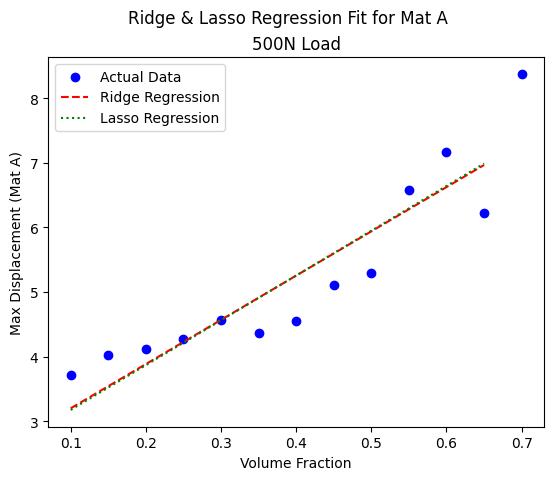

In [ ]:
# Fit models to Mat A displacement data
ridge.fit(X_tr_sc, y_tr_a)
lasso.fit(X_tr_sc, y_tr_a)

# Predict using Ridge & Lasso
ridge_preds_a = ridge.predict(X_te_sc)
lasso_preds_a = lasso.predict(X_te_sc)
print("R2 Score (Ridge - Mat A):", r2_score(y_te_h, ridge_preds_a))
print("MSE (Ridge - Mat A):", mean_squared_error(y_te_h, ridge_preds_a))

print("R2 Score (Lasso - Mat A):", r2_score(y_te_h, lasso_preds_a))
print("MSE (Lasso - Mat A):", mean_squared_error(y_te_h, lasso_preds_a))
# Print model coefficients
print("Ridge Coefficients for Mat A:", ridge.coef_)
print("Lasso Coefficients for Mat A:", lasso.coef_)

# Scatter plot of actual data
plt.scatter(X, y_mat_a, color="blue", label="Actual Data")

# Sort X values for smooth plotting
X_sorted = np.sort(X_te.values.flatten())
ridge_preds_sorted = ridge.predict(np.sort(X_te_sc, axis=0))
lasso_preds_sorted = lasso.predict(np.sort(X_te_sc, axis=0))

# Plot Ridge regression line
plt.plot(X_sorted, ridge_preds_sorted, color="red", label="Ridge Regression", linestyle="dashed")

# Plot Lasso regression line
plt.plot(X_sorted, lasso_preds_sorted, color="green", label="Lasso Regression", linestyle="dotted")

plt.xlabel("Volume Fraction")
plt.ylabel("Max Displacement (Mat A)")
plt.suptitle("Ridge & Lasso Regression Fit for Mat A")
plt.title('500N Load')
plt.legend()
plt.show()

Mat B Work

R2 Score (Ridge - Mat B): -2.8531452620734137
MSE (Ridge - Mat B): 72.4472790448277
R2 Score (Lasso - Mat B): -2.7836234740218018
MSE (Lasso - Mat B): 71.1401224140496
Ridge Coefficients for Mat B: [-0.18835154]
Lasso Coefficients for Mat B: [-0.10718669]


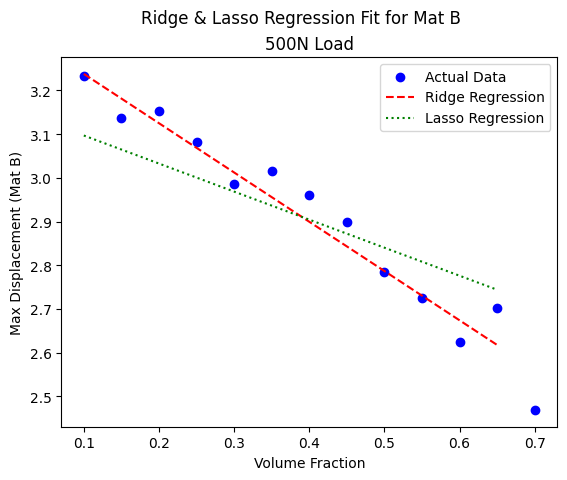

In [ ]:
# Fit models to Mat B displacement data
ridge.fit(X_tr_sc, y_tr_b)
lasso.fit(X_tr_sc, y_tr_b)

# Predict using Ridge & Lasso
ridge_preds_b = ridge.predict(X_te_sc)
lasso_preds_b = lasso.predict(X_te_sc)
print("R2 Score (Ridge - Mat B):", r2_score(y_te_h, ridge_preds_b))
print("MSE (Ridge - Mat B):", mean_squared_error(y_te_h, ridge_preds_b))

print("R2 Score (Lasso - Mat B):", r2_score(y_te_h, lasso_preds_b))
print("MSE (Lasso - Mat B):", mean_squared_error(y_te_h, lasso_preds_b))
# Print model coefficients
print("Ridge Coefficients for Mat B:", ridge.coef_)
print("Lasso Coefficients for Mat B:", lasso.coef_)

# Scatter plot of actual data
plt.scatter(X, y_mat_b, color="blue", label="Actual Data")

# Sort X values for smooth plotting
X_sorted = np.sort(X_te.values.flatten())
ridge_preds_sorted = ridge.predict(np.sort(X_te_sc, axis=0))
lasso_preds_sorted = lasso.predict(np.sort(X_te_sc, axis=0))

# Plot Ridge regression line
plt.plot(X_sorted, ridge_preds_sorted, color="red", label="Ridge Regression", linestyle="dashed")

# Plot Lasso regression line
plt.plot(X_sorted, lasso_preds_sorted, color="green", label="Lasso Regression", linestyle="dotted")

plt.xlabel("Volume Fraction")
plt.ylabel("Max Displacement (Mat B)")
plt.suptitle("Ridge & Lasso Regression Fit for Mat B")
plt.title('500N Load')
plt.legend()
plt.show()